<a href="https://colab.research.google.com/github/Es-Kiani/AI/blob/main/MKh_NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Linear Regression

##Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

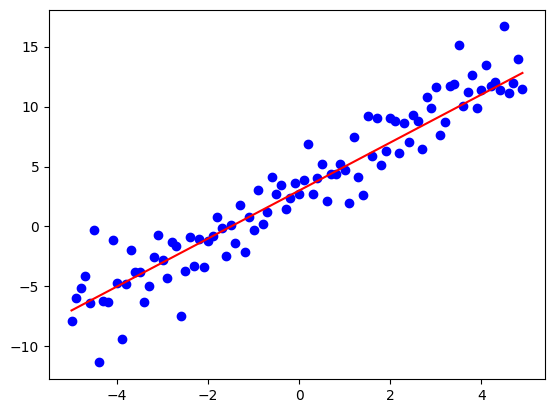

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*x + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')

plt.show()

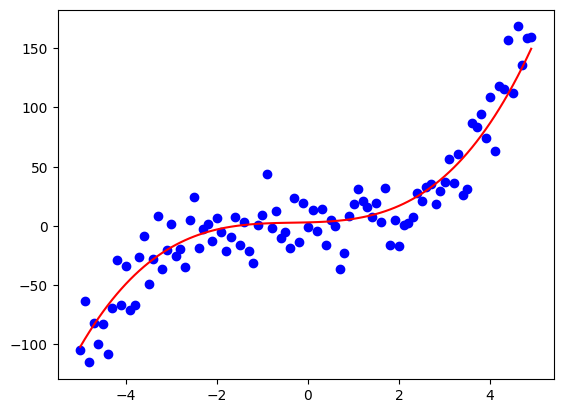

In [11]:
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')

plt.show()

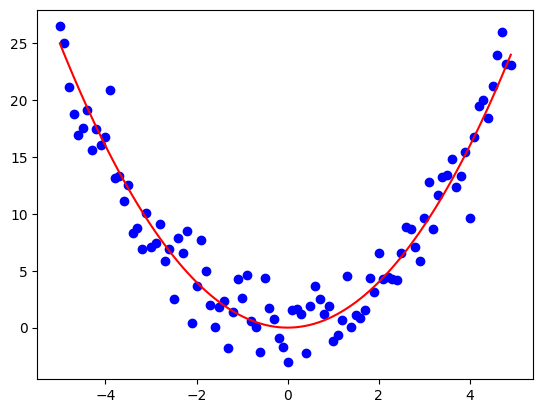

In [12]:
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.show()

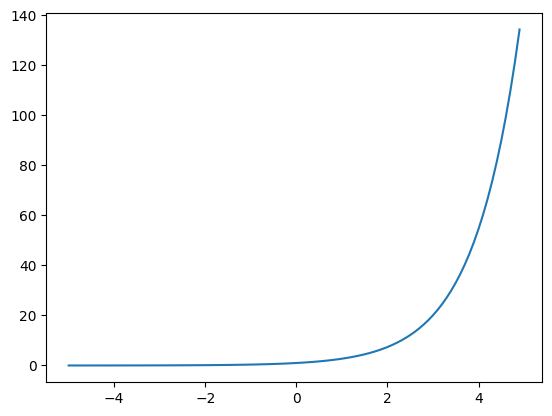

In [14]:
Y= np.exp(x)

plt.plot(x,Y)

plt.show()

<ipython-input-15-ef3cb5ab603d>:1: RuntimeWarning: invalid value encountered in log
  Y = np.log(x)


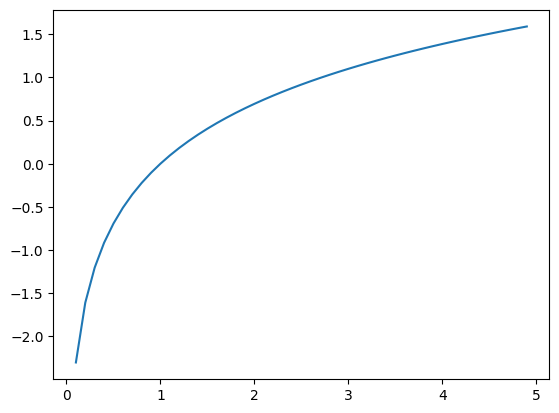

In [15]:
Y = np.log(x)

plt.plot(x,Y)
plt.show()

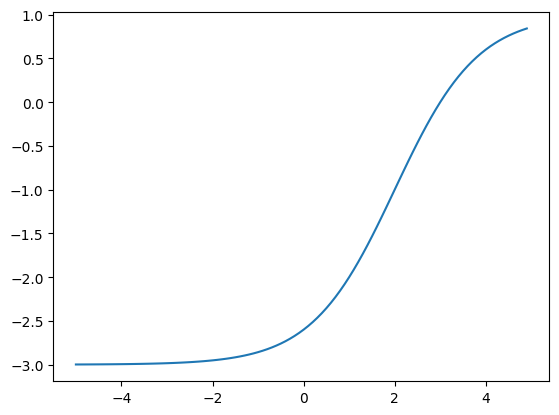

In [16]:
Y = 1-4/(1+np.power(3, x-2))

plt.plot(x,Y)

plt.show()

##Read Dataset

In [18]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

2024-05-06 20:41:32 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


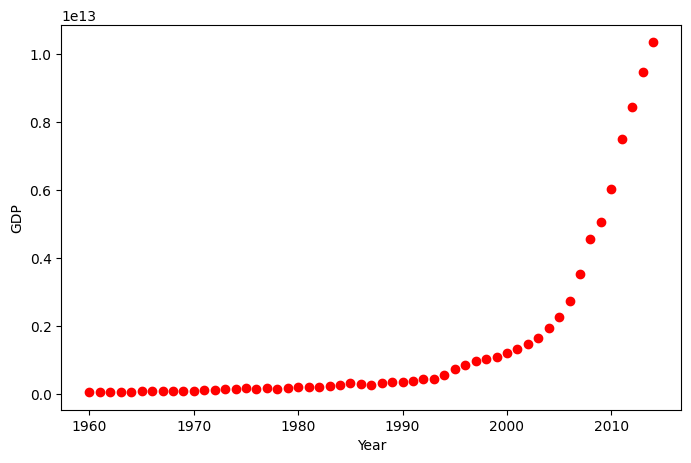

In [19]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##Model

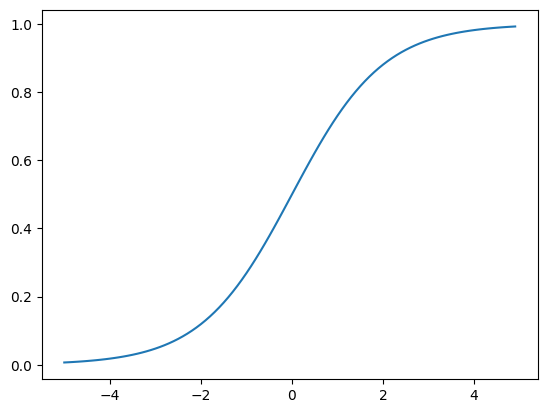

In [21]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.show()

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

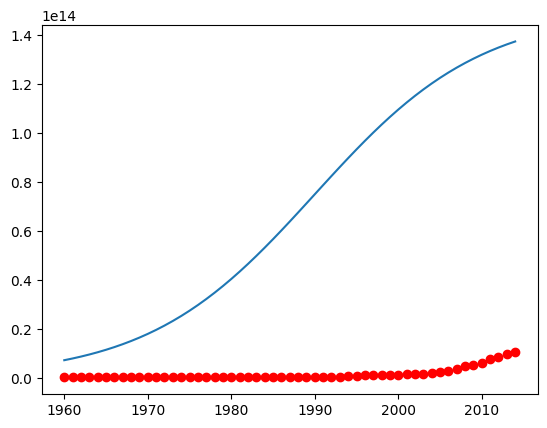

In [24]:
beta_1 = 0.10
beta_2 = 1990.0

Y_pred = sigmoid(x_data, beta_1 , beta_2)

plt.plot(x_data, Y_pred*15*10000000000000.)
plt.plot(x_data, y_data, 'ro')

##Normalize

In [25]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

##Fit

In [26]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(f" beta_1 = {popt[0]}, beta_2 = {popt[1]}")

 beta_1 = 690.451709, beta_2 = 0.997207


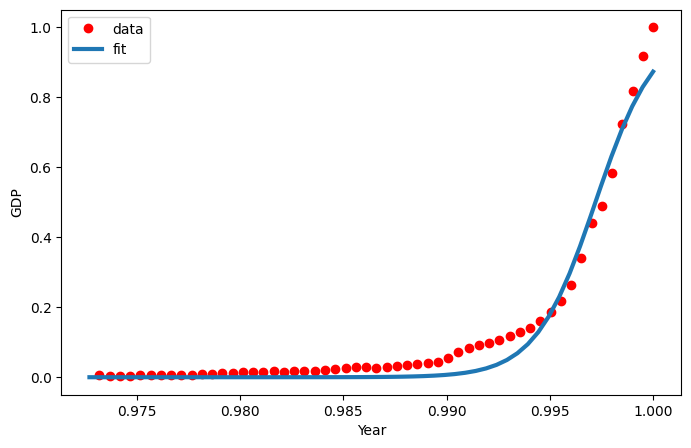

In [27]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##Accuracy

In [28]:
msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]
test_x = xdata[~msk]

train_y = ydata[msk]
test_y = ydata[~msk]

In [29]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [31]:
from sklearn.metrics import r2_score

print(f"MMAE: {np.mean(np.absolute(y_hat - test_y))}")
print(f"MSE: {np.mean((y_hat - test_y) ** 2)}")
print(f"R2-score: {r2_score(y_hat , test_y)}")

MMAE: 0.19479051888524945
MSE: 0.1227172765792266
R2-score: -2.380726610795022e+29
